<a href="https://colab.research.google.com/github/WilliamShengYangHuang/RC18_GenAI/blob/main/K_Means_basic_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering**: Expectation–Maximisation



Expectation–maximisation (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here. In short, the expectation–maximisation approach here consists of the following procedure:

Guess some cluster centers
Repeat until converged
E-Step: assign points to the nearest cluster center
M-Step: set the cluster centers to the mean
Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to. The "M-step" or "Maximisation step" is so-named because it involves maximising some fitness function that defines the location of the cluster centers—in this case, that maximisation is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarised as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

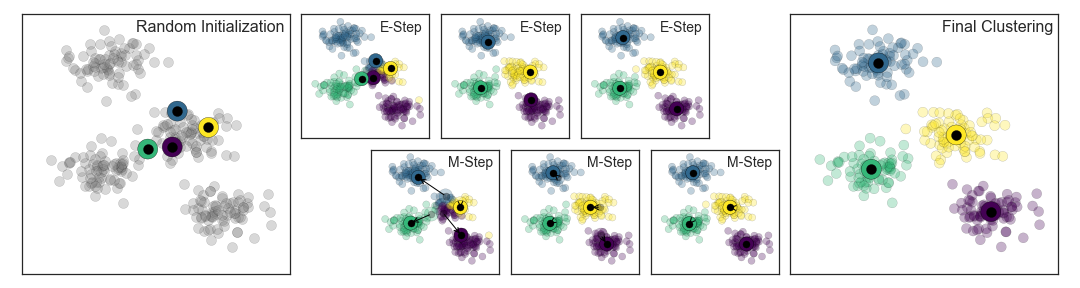

Reference: VanderPlas, J., 2016. *Python data science handbook: Essential tools for working with data*. O'Reilly Media, Inc.

## Import Packages

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from google.colab import drive
import os

## Load and Read Data

### *Case 1: Bus Dataset*

Option 1:

In [2]:


# Place the dataset in your Google Drive
drive.mount("/content/drive")

# Set csv file path
PATH = "/content/drive/My Drive/abalone_train.csv"

Mounted at /content/drive


In [3]:
# Read csv from Drive
df = pd.read_csv(PATH)
df

,c1,c2,c3,c4,c5,c6,c7,c8
0,0.435,0.335,0.110,0.3340,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.8740,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.0920,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.8790,0.3740,0.1695,0.2300,13
...,...,...,...,...,...,...,...,...
3315,0.605,0.475,0.180,0.9365,0.3940,0.2190,0.2950,15
3316,0.700,0.525,0.190,1.6015,0.7070,0.3650,0.4300,10
3317,0.530,0.420,0.130,0.8365,0.3745,0.1670,0.2490,11
3318,0.395,0.315,0.105,0.3515,0.1185,0.0910,0.1195,16


In [4]:
df.describe()

,c1,c2,c3,c4,c5,c6,c7,c8
count,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000
mean,0.522693,0.406575,0.139271,0.824734,0.357705,0.180162,0.237921,9.896988
std,0.121164,0.100120,0.042708,0.491182,0.222223,0.110182,0.140261,3.205654
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.345000,0.115000,0.436375,0.181500,0.092000,0.127375,8.000000
50%,0.540000,0.425000,0.140000,0.795250,0.335500,0.170750,0.230000,9.000000
75%,0.615000,0.480000,0.165000,1.150000,0.504500,0.253125,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,27.000000


Option 2:

In [5]:
df2 = df

In [6]:
"""
# Read csv from a local file path
from google.colab import files
uploaded = files.upload()

# Read data
df2 = pd.read_csv('abalone_train.csv')
df2
# df2.describe()
"""

"\n# Read csv from a local file path\nfrom google.colab import files\nuploaded = files.upload()\n\n# Read data\ndf2 = pd.read_csv('abalone_train.csv')\ndf2\n# df2.describe()\n"

In [7]:
df2['c1'] # Access one specific column

,c1
0,0.435
1,0.585
2,0.655
3,0.545
4,0.545
...,...
3315,0.605
3316,0.700
3317,0.530
3318,0.395


## K-Means Clustering

Set parameters

In [8]:
N = 3 #@param{type:'slider', min:2, max:8, step:1}

Training

In [9]:
kmeans = KMeans(n_clusters=N) # Create KMeans object incoporating the parameters
kmeans.fit(df) # Train KMeans model
y_kmeans = kmeans.predict(df) # make prediction(y) on dataset

In [10]:
X = df['c1'].tolist()
Y = df['c2'].tolist()
print(X)
print(Y)

[0.435, 0.585, 0.655, 0.545, 0.545, 0.57, 0.47, 0.61, 0.52, 0.485, 0.625, 0.615, 0.455, 0.475, 0.385, 0.67, 0.615, 0.52, 0.635, 0.72, 0.57, 0.725, 0.435, 0.685, 0.575, 0.575, 0.625, 0.355, 0.565, 0.47, 0.41, 0.55, 0.575, 0.55, 0.355, 0.58, 0.525, 0.63, 0.465, 0.63, 0.325, 0.645, 0.62, 0.495, 0.645, 0.575, 0.59, 0.465, 0.48, 0.62, 0.53, 0.65, 0.38, 0.665, 0.6, 0.465, 0.375, 0.585, 0.51, 0.425, 0.47, 0.445, 0.37, 0.5, 0.69, 0.615, 0.57, 0.65, 0.32, 0.52, 0.735, 0.375, 0.35, 0.665, 0.53, 0.62, 0.455, 0.565, 0.625, 0.58, 0.52, 0.61, 0.525, 0.565, 0.65, 0.38, 0.635, 0.775, 0.565, 0.39, 0.555, 0.4, 0.695, 0.71, 0.4, 0.29, 0.64, 0.75, 0.67, 0.585, 0.56, 0.395, 0.5, 0.74, 0.57, 0.47, 0.37, 0.64, 0.585, 0.675, 0.65, 0.56, 0.62, 0.6, 0.4, 0.505, 0.59, 0.545, 0.515, 0.705, 0.38, 0.44, 0.37, 0.475, 0.37, 0.36, 0.645, 0.615, 0.385, 0.655, 0.48, 0.56, 0.505, 0.625, 0.64, 0.595, 0.5, 0.455, 0.58, 0.495, 0.535, 0.625, 0.525, 0.295, 0.36, 0.19, 0.485, 0.63, 0.625, 0.18, 0.545, 0.77, 0.505, 0.565, 0.4, 

## Plotting Clustering Results

Colourmap(cmap) Reference: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Some most common cmaps:

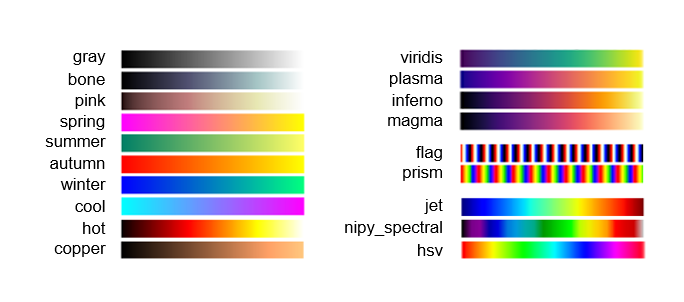

[[ 0.46141285  0.35430399  0.11842356  0.56957525  0.2598953   0.12463831
   0.15904015  7.57763236]
 [ 0.58450185  0.45854982  0.15861624  1.07198635  0.4636583   0.23661033
   0.30661993 11.22140221]
 [ 0.59051056  0.46799296  0.17036972  1.15535563  0.43112148  0.23948239
   0.37704225 17.30633803]]


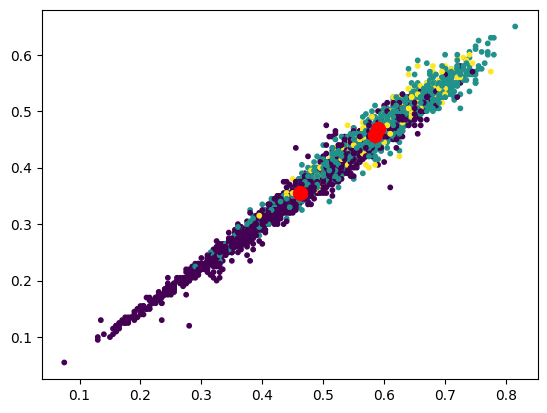

In [11]:
plt.scatter(X, Y, c=y_kmeans, s=10, cmap='viridis') # Plot clustering results

centers = kmeans.cluster_centers_ # Access centre points
print(centers)

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=1); # Plot centre points

### *Case 2: California Housing Dataset*

In [12]:
PATH_2 = "/content/drive/My Drive/california_housing_train.csv" #@param{type:'string'}
df = pd.read_csv(PATH_2)

In [13]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
N2 = 4 #@param{type:'slider', min:2, max:16, step:1}

In [15]:
kmeans_cal = KMeans(n_clusters=N2)
kmeans_cal.fit(df)
y_kmeans_cal = kmeans_cal.predict(df)

In [16]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
kmeans_cal.labels_ # type: np.ndarray

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 3, 1, 0, 2,
       1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1,

In [17]:
results = np.where(kmeans_cal.labels_== 3) # Find the instances of the selected cluster

type(results)
print(type(results))

print(results)

<class 'tuple'>
(array([  215,   220,   260,   521,   650,   695,   698,   759,   809,
         818,   862,  1224,  1293,  1323,  1339,  1340,  1386,  1387,
        1388,  1404,  1424,  1425,  1428,  1429,  1430,  1453,  1465,
        1467,  1468,  1470,  1494,  1528,  1529,  1530,  1559,  1564,
        1624,  1625,  1630,  1631,  1643,  1679,  1680,  1700,  1701,
        1702,  1703,  1743,  1744,  1745,  1746,  1747,  1749,  1750,
        1751,  1752,  1753,  1774,  1776,  1792,  1800,  1802,  1803,
        1804,  1805,  1806,  1807,  1808,  1809,  1813,  1837,  1857,
        1858,  1859,  1860,  1861,  1862,  1896,  1898,  1936,  1937,
        1964,  2005,  2007,  2008,  2009,  2039,  2047,  2150,  2204,
        2383,  2401,  2402,  2431,  2432,  2459,  2471,  2479,  2493,
        2499,  2517,  2519,  2536,  2542,  2551,  2584,  2586,  2587,
        2596,  2601,  2635,  2668,  2671,  2696,  2698,  2703,  2757,
        2772,  2802,  2805,  2806,  2832,  2833,  2853,  2855,  2856,
   

In [18]:
X = df['longitude'].tolist()
Y = df['latitude'].tolist()
print(X)
print(Y)

[-114.31, -114.47, -114.56, -114.57, -114.57, -114.58, -114.58, -114.59, -114.59, -114.6, -114.6, -114.6, -114.61, -114.61, -114.63, -114.65, -114.65, -114.65, -114.66, -114.67, -114.68, -114.73, -114.94, -114.98, -115.22, -115.32, -115.37, -115.37, -115.37, -115.37, -115.38, -115.38, -115.39, -115.4, -115.4, -115.41, -115.46, -115.48, -115.48, -115.49, -115.49, -115.49, -115.49, -115.5, -115.5, -115.5, -115.51, -115.51, -115.51, -115.51, -115.52, -115.52, -115.52, -115.52, -115.52, -115.52, -115.52, -115.52, -115.52, -115.53, -115.53, -115.53, -115.53, -115.53, -115.54, -115.54, -115.54, -115.54, -115.54, -115.55, -115.55, -115.55, -115.55, -115.55, -115.55, -115.55, -115.56, -115.56, -115.56, -115.56, -115.56, -115.56, -115.56, -115.56, -115.56, -115.56, -115.57, -115.57, -115.57, -115.57, -115.57, -115.57, -115.57, -115.57, -115.58, -115.58, -115.58, -115.58, -115.58, -115.59, -115.59, -115.59, -115.6, -115.6, -115.62, -115.62, -115.64, -115.69, -115.72, -115.73, -115.73, -115.73, -

[[-1.19869981e+02  3.54702546e+01  2.90600440e+01  3.09682395e+03
   5.88529079e+02  1.45774222e+03  5.55656397e+02  4.92721654e+00
   3.07506193e+05]
 [-1.19609912e+02  3.62325306e+01  2.76967891e+01  2.32129262e+03
   5.02949024e+02  1.37674959e+03  4.57247931e+02  2.65219830e+00
   1.00325653e+05]
 [-1.19296754e+02  3.51857561e+01  2.80997897e+01  2.64410367e+03
   5.55698205e+02  1.53205337e+03  5.20736697e+02  3.78108654e+00
   1.92937587e+05]
 [-1.19795803e+02  3.53371769e+01  3.29322459e+01  2.95957026e+03
   5.16419699e+02  1.17608030e+03  4.83577792e+02  6.86594210e+00
   4.68530498e+05]]


<>:8: SyntaxWarning: invalid escape sequence '\k'
<>:8: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipython-input-3471769438.py:8: SyntaxWarning: invalid escape sequence '\k'
  plt.savefig(PATH + '\k-means.png')


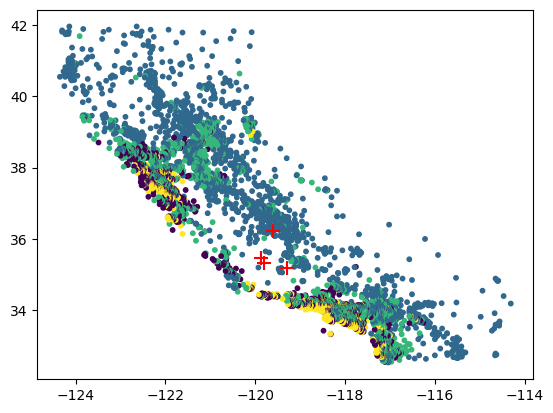

In [19]:
plt.scatter(X, Y, c=y_kmeans_cal, s=10, cmap='viridis')

centers = kmeans_cal.cluster_centers_
print(centers)

plt.scatter(centers[:, 0], centers[:, 1], marker='+', c='red', s=100, alpha=1); # Plot centre points

plt.savefig(PATH + '\k-means.png')

### *Case 2-1: 3D K-Means on California Housing Dataset*

In [20]:
Z = df['housing_median_age'].tolist()
print(Z)

[15, 19, 17, 14, 20, 29, 25, 41, 34, 46, 16, 21, 48, 31, 15, 17, 28, 21, 17, 17, 20, 24, 20, 15, 18, 34, 30, 14, 32, 23, 38, 35, 16, 19, 19, 29, 33, 21, 15, 19, 17, 29, 25, 13, 18, 35, 32, 21, 20, 11, 30, 18, 38, 32, 24, 10, 18, 17, 6, 12, 25, 35, 34, 14, 23, 17, 27, 41, 23, 33, 24, 34, 23, 23, 22, 5, 21, 28, 25, 15, 20, 18, 46, 35, 29, 15, 33, 17, 29, 31, 16, 34, 20, 15, 21, 5, 10, 14, 5, 20, 8, 30, 37, 3, 20, 17, 23, 18, 16, 19, 23, 27, 44, 2, 20, 34, 15, 19, 15, 18, 5, 12, 27, 8, 15, 16, 26, 24, 20, 8, 19, 17, 29, 15, 16, 13, 20, 17, 32, 18, 22, 10, 12, 18, 22, 13, 17, 25, 16, 26, 23, 28, 22, 28, 19, 34, 19, 14, 23, 26, 38, 28, 9, 29, 32, 17, 14, 25, 10, 24, 33, 5, 3, 17, 37, 6, 5, 10, 20, 15, 11, 7, 18, 10, 19, 13, 5, 11, 24, 9, 16, 11, 17, 7, 12, 14, 6, 7, 10, 17, 15, 15, 19, 10, 16, 9, 8, 25, 17, 12, 14, 15, 26, 17, 8, 24, 19, 18, 17, 18, 5, 9, 16, 22, 6, 33, 22, 18, 3, 7, 27, 10, 14, 8, 27, 13, 5, 10, 16, 26, 20, 15, 21, 16, 12, 21, 13, 13, 17, 21, 18, 18, 5, 16, 28, 18, 31, 24,

[[-1.19869981e+02  3.54702546e+01  2.90600440e+01  3.09682395e+03
   5.88529079e+02  1.45774222e+03  5.55656397e+02  4.92721654e+00
   3.07506193e+05]
 [-1.19609912e+02  3.62325306e+01  2.76967891e+01  2.32129262e+03
   5.02949024e+02  1.37674959e+03  4.57247931e+02  2.65219830e+00
   1.00325653e+05]
 [-1.19296754e+02  3.51857561e+01  2.80997897e+01  2.64410367e+03
   5.55698205e+02  1.53205337e+03  5.20736697e+02  3.78108654e+00
   1.92937587e+05]
 [-1.19795803e+02  3.53371769e+01  3.29322459e+01  2.95957026e+03
   5.16419699e+02  1.17608030e+03  4.83577792e+02  6.86594210e+00
   4.68530498e+05]]


Text(0.5, 0, 'Housing midian age')

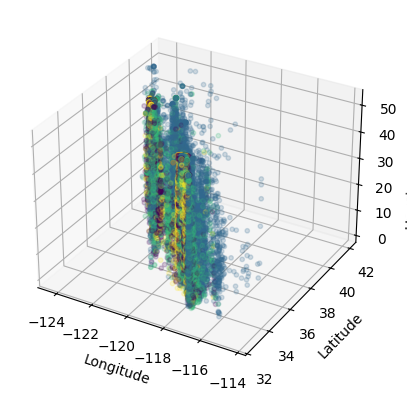

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=y_kmeans_cal, s=10, cmap='viridis', alpha=0.2)

centers = kmeans_cal.cluster_centers_
print(centers)

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='+', c='red', s=100, alpha=1.0); # Plot centre points

# plot axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Housing midian age')